<a href="https://colab.research.google.com/github/wingyen/GiT_savvy_sisters/blob/Kani/KK_Kopie_von_ML_challenge_GIT_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
! pip install shap
import numpy as np
import pandas as pd
import datetime
import random
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.style.use('ggplot')
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
import shap
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore", category=FutureWarning)


In [145]:
df = pd.read_csv(r"/content/data_set.csv")

print("Number of df samples are",df.shape)

categorical_features = ['State_Factor', 'building_class', 'facility_type']
numerical_features=df.select_dtypes('number').columns


Number of df samples are (75757, 64)


In [146]:
missing_columns = [col for col in df.columns if df[col].isnull().any()]
missingvalues_count =df.isna().sum()
missingValues_df = pd.DataFrame(missingvalues_count.rename('Null Values Count')).loc[missingvalues_count.ne(0)]
missingValues_df.style.background_gradient(cmap="Pastel1")



,Null Values Count
year_built,1837
energy_star_rating,26709
direction_max_wind_speed,41082
direction_peak_wind_speed,41811
max_wind_speed,41082
days_with_fog,45796


In [3]:
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


Text(0.5, 1.0, 'Missing values in  Data')

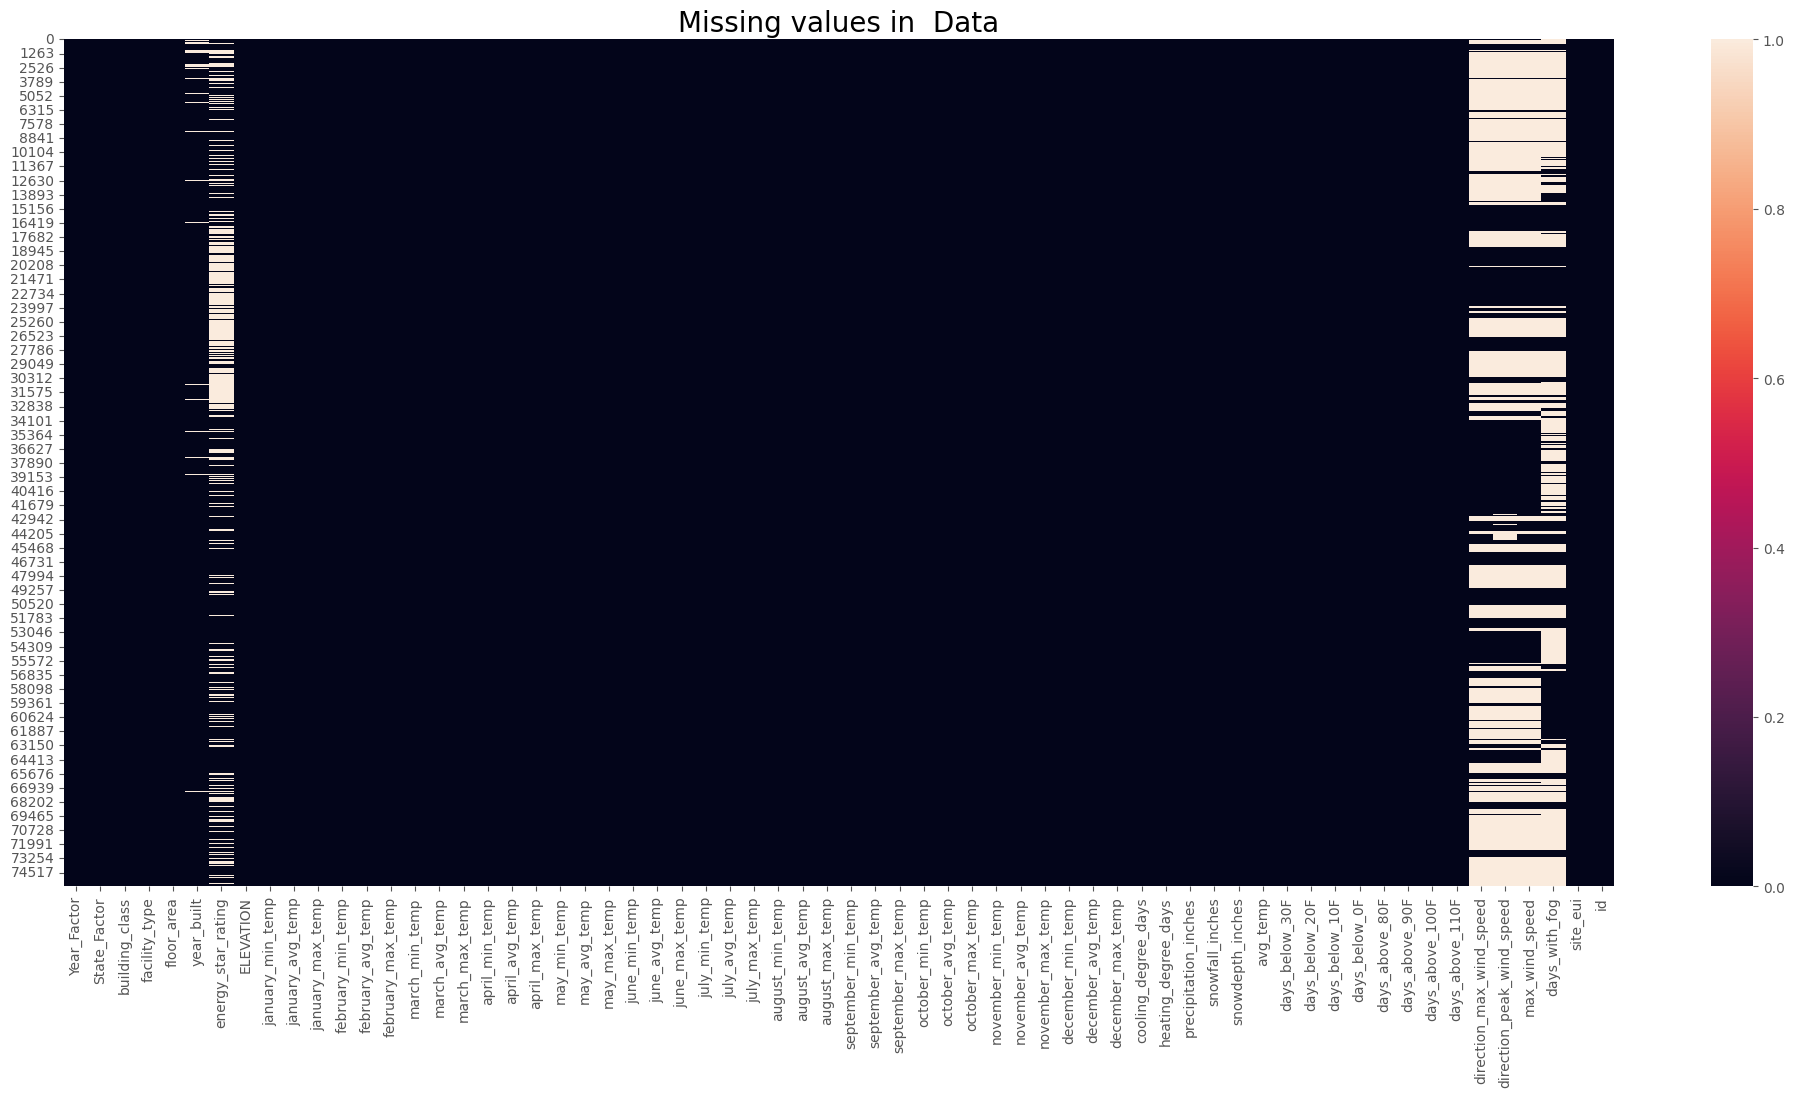

In [3]:
plt.figure(figsize = (25,11))
sns.heatmap(df.isna().values, xticklabels=df.columns)
plt.title("Missing values in  Data", size=20)

In [148]:
missing_columns = [col for col in df.columns if df[col].isnull().any()]
missingvalues_count =df.isna().sum()
missingValues_df = pd.DataFrame(missingvalues_count.rename('Null Values Count')).loc[missingvalues_count.ne(0)]
missingValues_df.style.background_gradient(cmap="Pastel1")

df['year_built'] =df['year_built'].replace(np.nan, 2022)
null_col=['energy_star_rating','direction_max_wind_speed','direction_peak_wind_speed','max_wind_speed','days_with_fog']
imputer = SimpleImputer()
imputer.fit(df[null_col])
data_transformed = imputer.transform(df[null_col])
df[null_col] = pd.DataFrame(data_transformed)

Text(0.5, 1.0, 'Missing values in training Data')

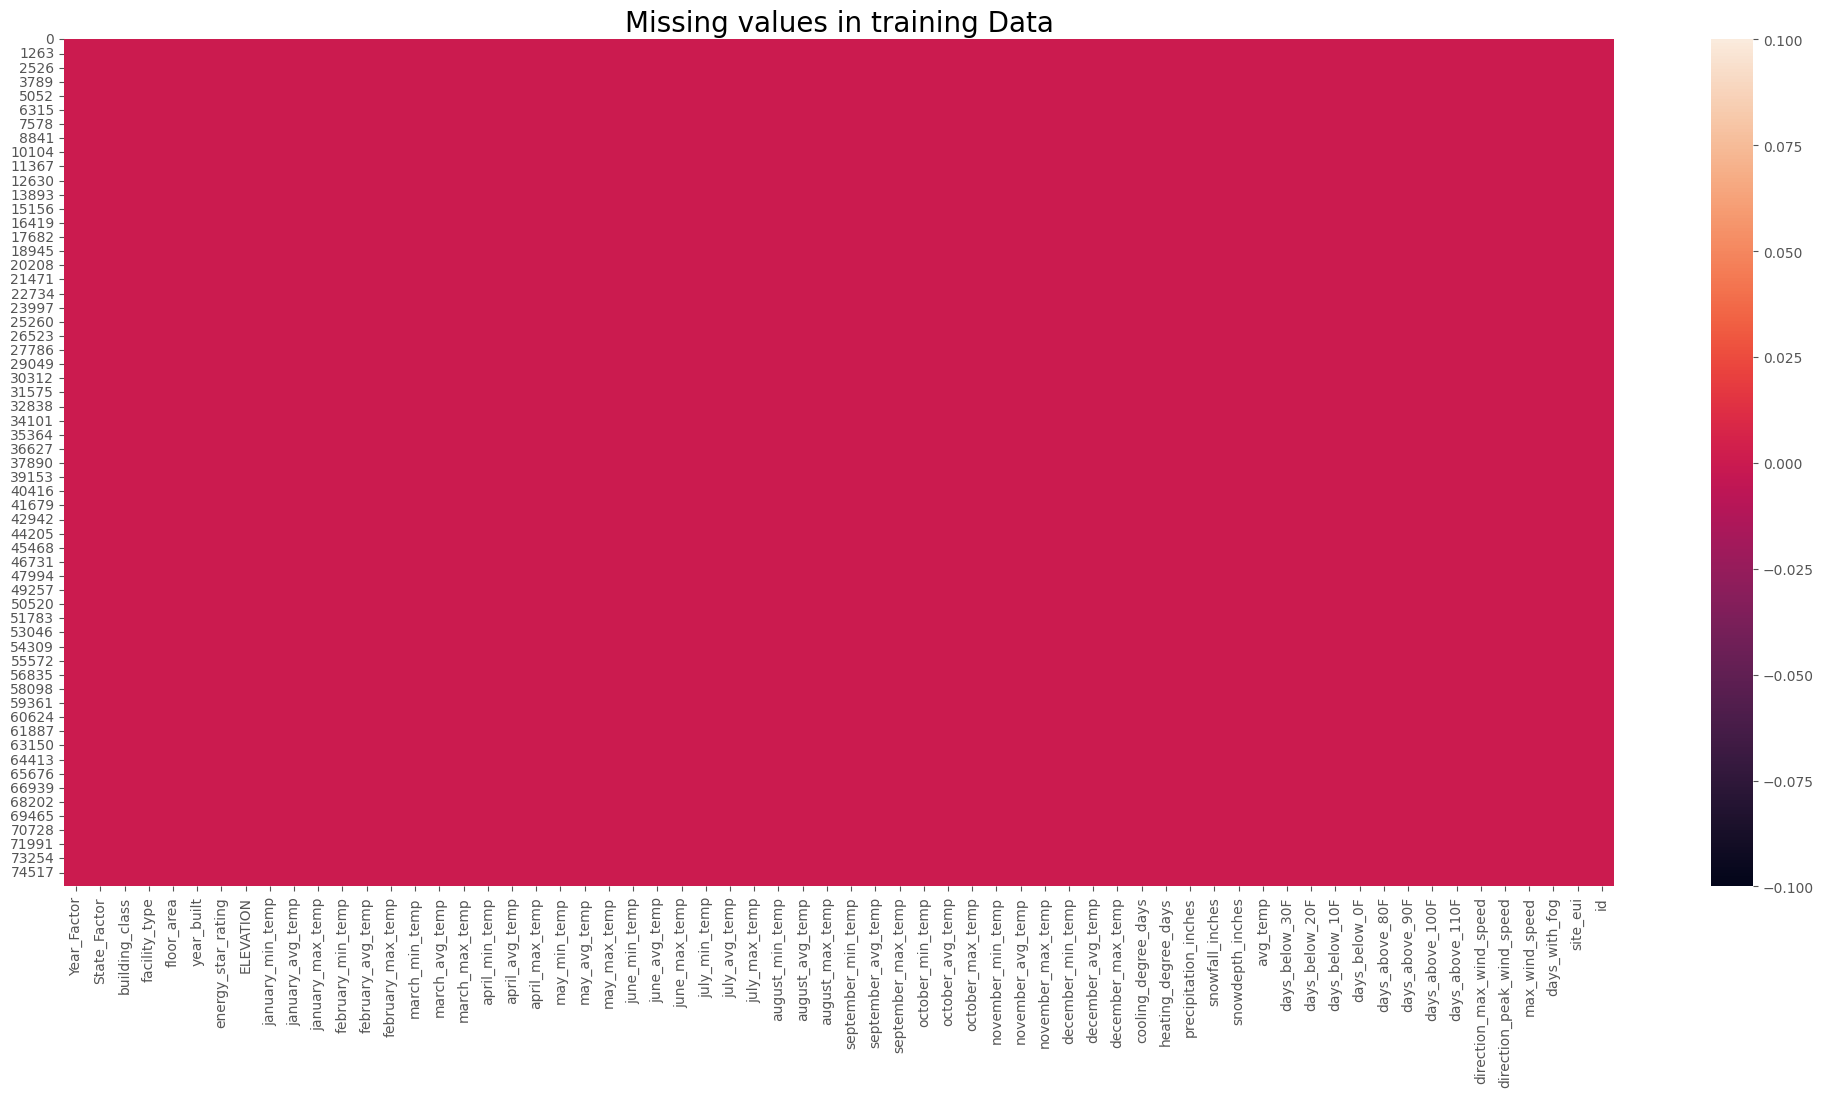

In [79]:
plt.figure(figsize = (25,11))
sns.heatmap(df.isna().values, xticklabels=df.columns)
plt.title("Missing values in training Data", size=20)

In [82]:
df.info

<bound method DataFrame.info of        Year_Factor State_Factor building_class  \
0                1      State_1     Commercial   
1                1      State_1     Commercial   
2                1      State_1     Commercial   
3                1      State_1     Commercial   
4                1      State_1     Commercial   
...            ...          ...            ...   
75752            6     State_11     Commercial   
75753            6     State_11    Residential   
75754            6     State_11     Commercial   
75755            6     State_11     Commercial   
75756            6     State_11    Residential   

                                   facility_type  floor_area  year_built  \
0                   Grocery_store_or_food_market     61242.0      1942.0   
1      Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                           Retail_Enclosed_mall    280025.0      1951.0   
3                      Education_Other_classroom     55325.0   

In [149]:
#import pandas as pd


# Calculate the mean for each 'facility_type'
mean_values = df.groupby('facility_type')['site_eui'].transform('mean')

# Add the mean values as a new column
df['mean_value_by_facility_type'] = mean_values

# Display the updated DataFrame
print(df['mean_value_by_facility_type'])


0        241.135162
1         39.559542
2        100.965937
3         69.441531
4         38.209399
            ...    
75752     77.074389
75753     36.737785
75754     92.642037
75755     92.642037
75756     31.876915
Name: mean_value_by_facility_type, Length: 75757, dtype: float64


In [120]:
print(df[['facility_type','mean_value_by_facility_type']].iloc[500])

facility_type                  Warehouse_Distribution_or_Shipping_center
mean_value_by_facility_type                                    39.559542
Name: 500, dtype: object


In [150]:
le = LabelEncoder()
for col in categorical_features:
    df[col] = le.fit_transform(df[col])

In [84]:
df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id,mean_value_by_facility_type
0,1,0,0,13,61242.0,1942.0,11.0,2.4,36,50.5,...,0,0,0,1.0,1.000000,1.0,109.142051,248.682615,0,241.135162
1,1,0,0,55,274000.0,1955.0,45.0,1.8,36,50.5,...,0,0,0,1.0,62.779974,1.0,12.000000,26.500150,1,39.559542
2,1,0,0,48,280025.0,1951.0,97.0,1.8,36,50.5,...,0,0,0,1.0,62.779974,1.0,12.000000,24.693619,2,100.965937
3,1,0,0,6,55325.0,1980.0,46.0,1.8,36,50.5,...,0,0,0,1.0,62.779974,1.0,12.000000,48.406926,3,69.441531
4,1,0,0,56,66000.0,1985.0,100.0,2.4,36,50.5,...,0,0,0,1.0,1.000000,1.0,109.142051,3.899395,4,38.209399


In [8]:
df.describe().style.background_gradient()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id,mean_value_by_facility_type
count,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000
mean,4.367755,4.237998,0.574970,25.931914,165983.865858,1953.996726,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,58.486278,21.606281,44.469292,70.897831,32.037171,53.784863,82.661932,44.706179,63.742547,88.987856,51.131763,71.066384,91.400280,60.571604,76.596879,95.543950,58.515068,75.348749,92.572581,50.791689,69.597545,92.171139,38.210911,58.727038,81.135671,28.630397,48.123133,71.202397,22.736777,41.625569,64.496852,1202.250446,4324.957390,42.430651,29.136379,164.862455,56.176705,48.756511,17.447932,4.886532,0.876764,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000,82.584693
std,1.471441,1.549536,0.494351,11.645404,246875.790940,38.139247,23.063738,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,8.414611,10.004303,6.657142,7.680982,5.577279,2.500473,4.101028,4.200319,2.792919,2.864669,3.415926,2.861681,3.604068,4.177109,4.090275,4.157118,4.441992,3.818895,4.139685,4.290884,3.603773,5.011708,5.093899,2.641300,5.579513,7.153244,4.094207,4.373374,9.014047,5.869386,6.054104,391.561780,824.366727,10.592205,17.810894,175.275869,2.241940,27.587124,14.469435,7.071221,2.894244,25.282913,10.943996,2.252323,0.142140,88.726751,87.226977,4.369629,31.883663,58.255403,21869.306509,27.426500
min,1.000000,0.000000,0.000000,0.000000,943.000000,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,38.000000,-9.000000,25.854839,53.000000,15.000000,40.280000,62.000000,23.000000,46.950000,64.000000,30.000000,54.100000,67.000000,37.000000,54.822581,65.000000,31.000000,56.693548,66.000000,26.000000,53.600000,64.000000,18.000000,44.693548,59.000000,4.000000,30.766667,53.000000,-16.000000,23.790323,42.000000,0.000000,398.000000,0.000000,0.000000,0.000000,44.512329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000,21.589284
25%,3.000000,4.000000,0.000000,27.000000,62379.000000,1927.000000,56.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,55.000000,13.000000,38.096774,62.000000,26.000000,52.333333,80.00

In [151]:
import copy
y = df["site_eui"]
train = df.drop(["site_eui","id"],axis =1)
trainnames = copy.deepcopy(train)
scaler = StandardScaler()
train = scaler.fit_transform(train)


In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.2, random_state = 50)


In [153]:
X = df.drop("site_eui", axis=1).values

In [154]:
X_test_ft=pd.DataFrame(X_test,columns=trainnames.columns)
X_test_ft.shape

(15152, 63)

In [13]:
import xgboost
xgboost_model = xgboost.XGBRegressor(n_estimators=200, learning_rate=0.02, gamma=0, subsample=0.75,
                           colsample_bytree=0.4, max_depth=5)
xgboost_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [129]:
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgboost_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = trainnames.columns.tolist(), top=63)

Weight,Feature
0.2845 ± 0.0142,energy_star_rating
0.2093 ± 0.0049,mean_value_by_facility_type
0.0371 ± 0.0070,floor_area
0.0294 ± 0.0014,facility_type
0.0144 ± 0.0039,building_class
0.0137 ± 0.0015,State_Factor
0.0126 ± 0.0010,year_built
0.0037 ± 0.0007,january_avg_temp
0.0033 ± 0.0006,february_avg_temp
0.0026 ± 0.0007,ELEVATION


In [131]:
explainer = shap.Explainer(xgboost_model)
shap_values = explainer(X_test_ft)

[10:42:35] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


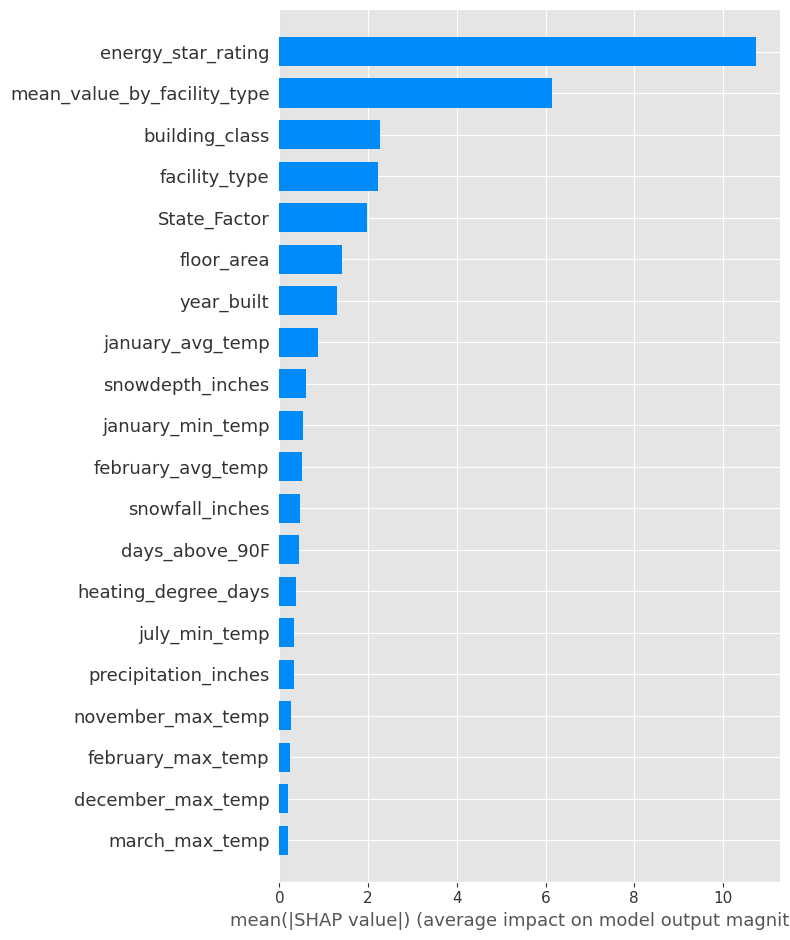

In [132]:
#Variable Importance Plot
shap.summary_plot(shap_values, X_test_ft,plot_type="bar")

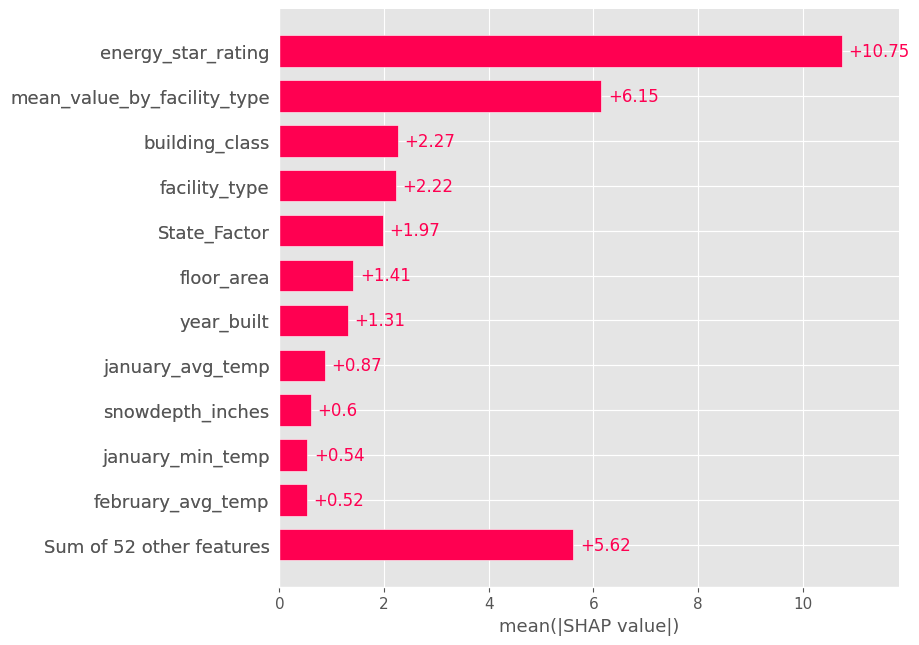

In [133]:
shap.plots.bar(shap_values,max_display=12)

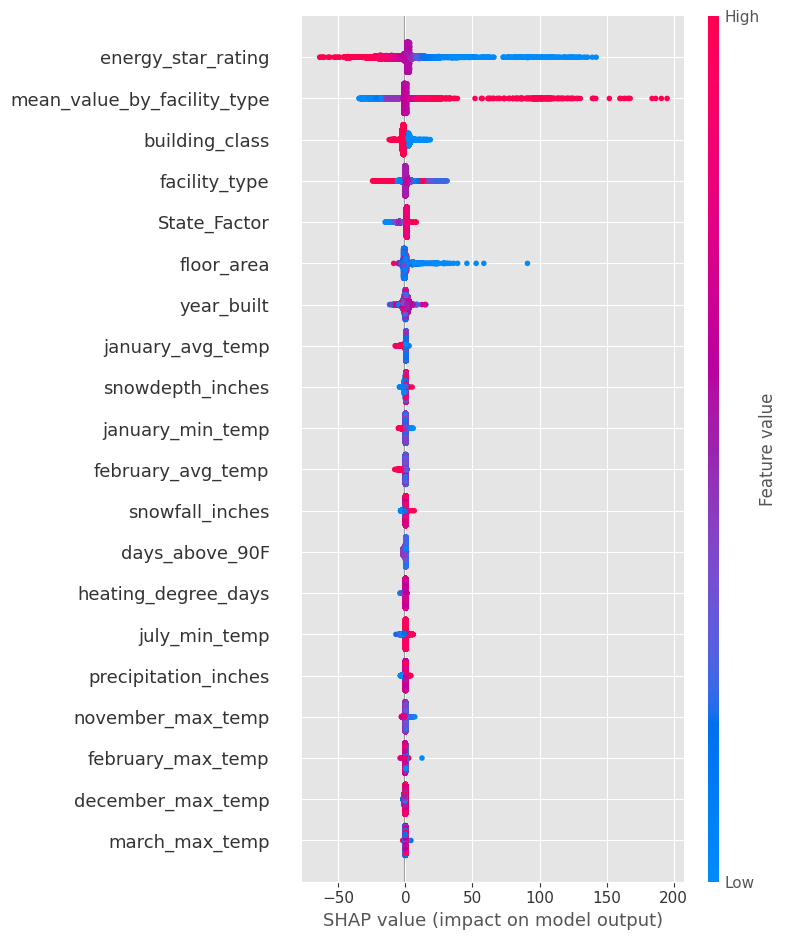

In [134]:
shap.summary_plot(shap_values, X_test_ft)

In [ ]:
shap_interaction_values = explainer.shap_interaction_values(X_test_ft)
shap.summary_plot(shap_interaction_values, X_test_ft)

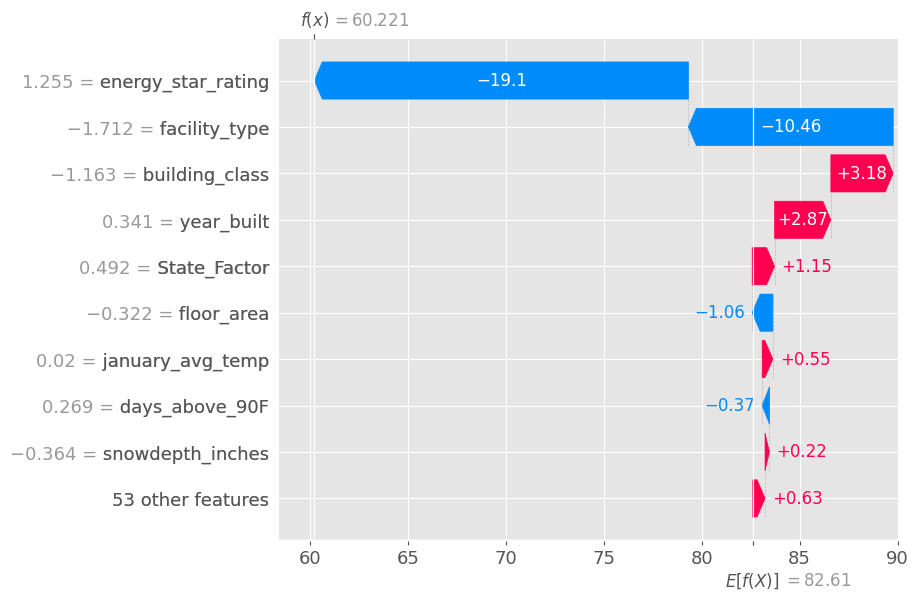

In [24]:
shap.plots.waterfall(shap_values[0])

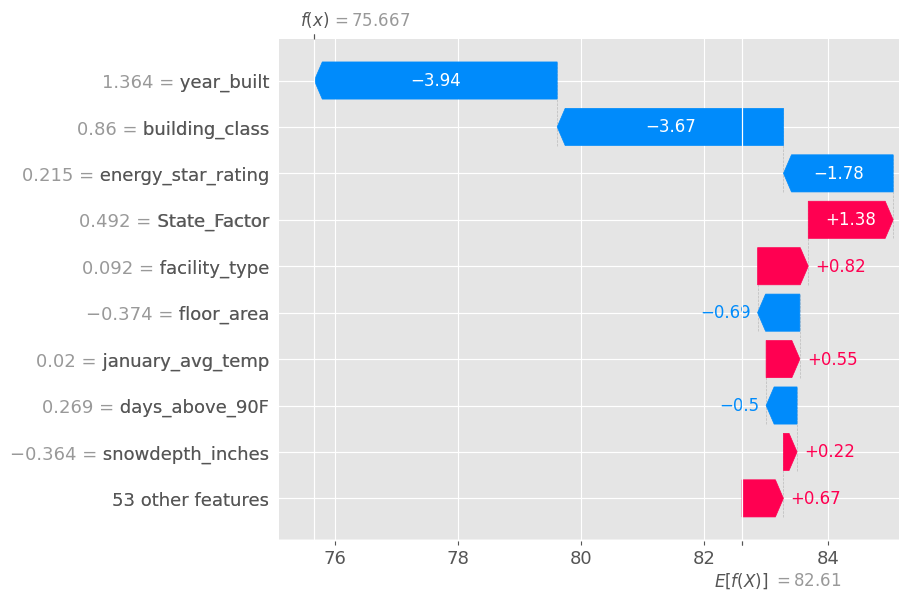

In [25]:
shap.plots.waterfall(shap_values[1])

In [ ]:
explainer = shap.TreeExplainer(xgboost_model)
shap_values = explainer.shap_values(X_test_ft)
shap.initjs()
def p(j):
    return(shap.force_plot(explainer.expected_value, shap_values[j,:], X_test_ft.iloc[j,:]))
p(0)

In [ ]:
import xgboost
xgboost_model = xgboost.XGBRegressor(n_estimators=200, learning_rate=0.02, gamma=0, subsample=0.75,
                           colsample_bytree=0.4, max_depth=5)
xgboost_model.fit(X_train,y_train)


In [46]:
p(1)

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


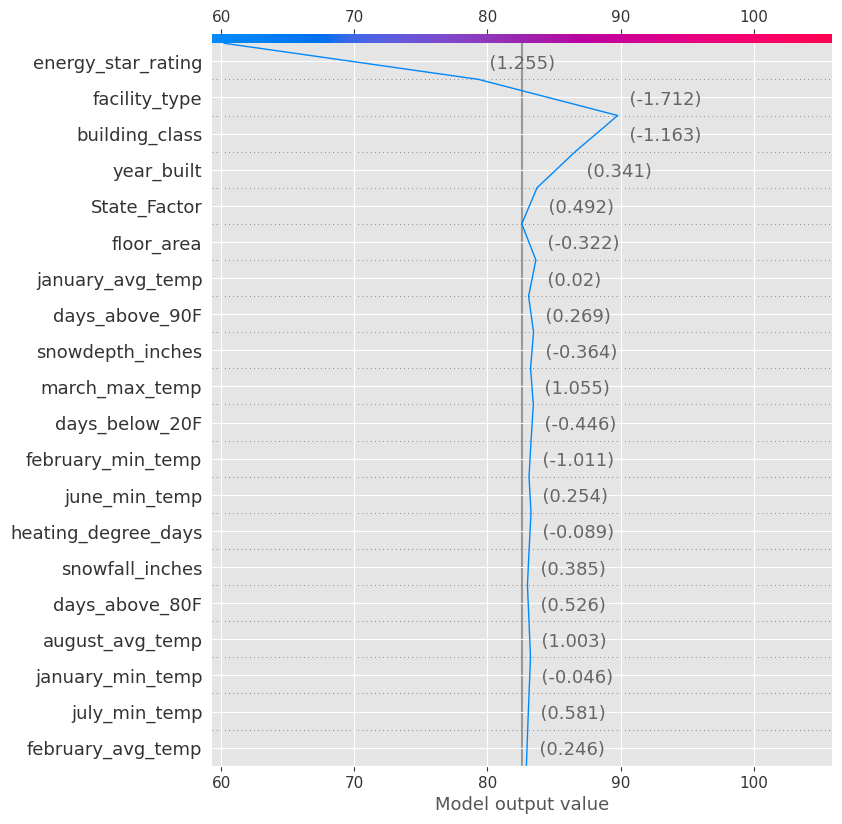

In [28]:
expected_value = explainer.expected_value
shap_values = explainer.shap_values(X_test_ft)[0]
shap.decision_plot(expected_value, shap_values, X_test_ft)

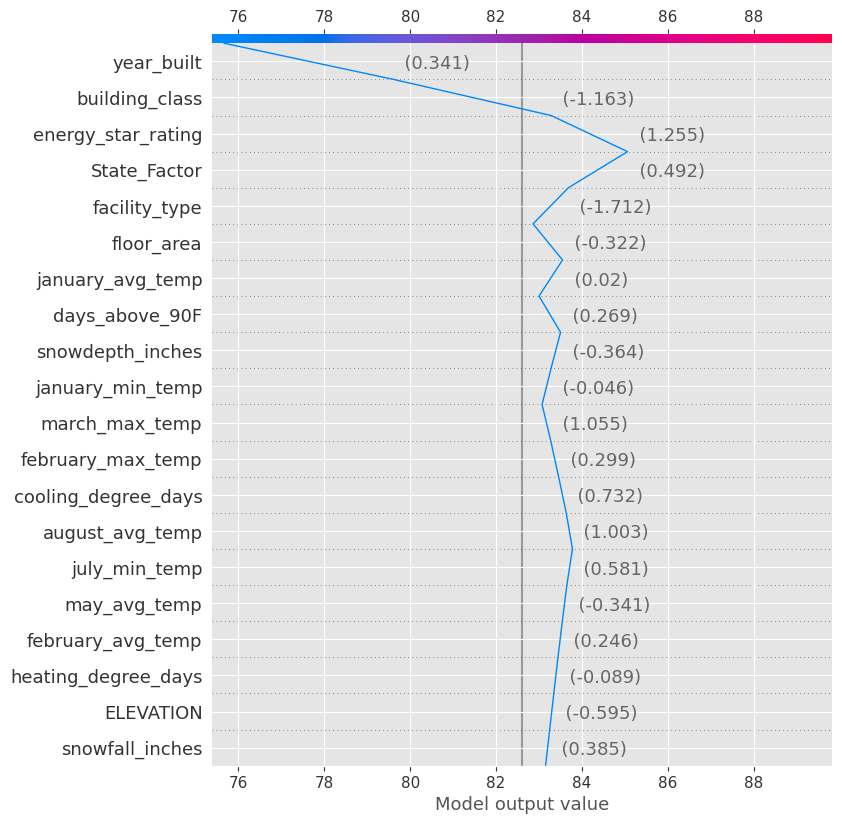

In [29]:
shap_values = explainer.shap_values(X_test_ft)[1]
shap.decision_plot(expected_value, shap_values, X_test_ft)

In [38]:

#!pip install lime
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train,
                    feature_names=trainnames.columns,
                    class_names=['site_eui'],
                    categorical_features=categorical_features,
                    verbose=True, mode='regression')

Intercept 86.92993229737563
Prediction_local [97.29348461]
Right: 60.22066


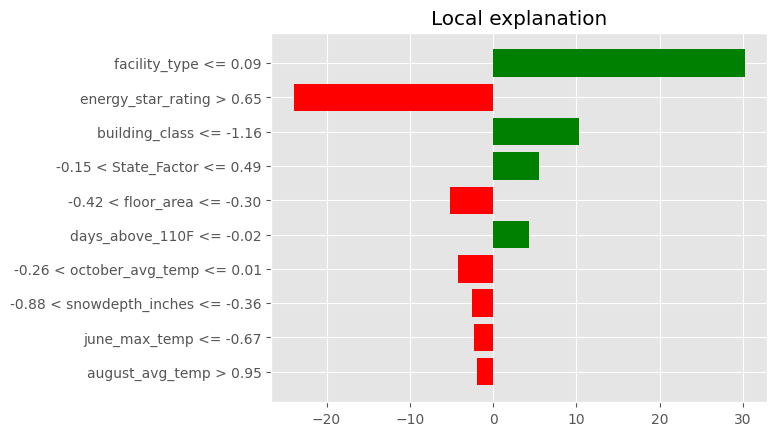

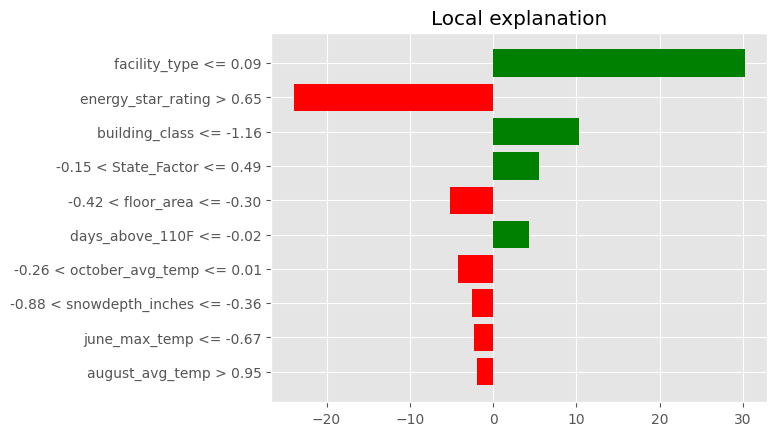

In [39]:
exp = explainer.explain_instance(X_test_ft.iloc[0],
     xgboost_model.predict, num_features=10)
exp.as_pyplot_figure()

In [23]:
import xgboost
xgboost_model = xgboost.XGBRegressor(n_estimators=200, learning_rate=0.02, gamma=0, subsample=0.75,
                           colsample_bytree=0.4, max_depth=5)
xgboost_model.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [24]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 250],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 4],
    'subsample': [0.6, 0.9],
    'colsample_bytree': [0.2, 0.5],
    'gamma': [0.01, 0.05]
}

# Create an XGBoost regressor
xgboost_model = xgboost.XGBRegressor()

# Create GridSearchCV
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) on Test Set:", rmse)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.


Best Hyperparameters: {'colsample_bytree': 0.5, 'gamma': 0.01, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 250, 'subsample': 0.9}
Root Mean Squared Error (RMSE) on Test Set: 42.30138698935225


In [32]:
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

ada_reg = AdaBoostRegressor(n_estimators=100)
print(ada_reg)

ada_reg.fit(X_train, y_train)
### - cross validataion
scores = cross_val_score(ada_reg, X_train,y_train,cv=5)
print("Mean cross-validataion score: %.2f" % scores.mean())

# k-fold cross validataion
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(ada_reg, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

# prediction
y_pred = ada_reg.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

AdaBoostRegressor(n_estimators=100)
Mean cross-validataion score: -0.37
K-fold CV average score: -0.33
MSE: 4703.37
RMSE: 68.58


In [ ]:
# plotting the result
#x_ax = range(len(ytest))
#plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
#plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
#plt.legend()
#plt.show()

In [20]:
y_pred_train=best_model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))

In [21]:
rmse

41.603700904267306

In [66]:
df.info

<bound method DataFrame.info of        Year_Factor  State_Factor  building_class  facility_type  floor_area  \
0                1             0               0             13     61242.0   
1                1             0               0             55    274000.0   
2                1             0               0             48    280025.0   
3                1             0               0              6     55325.0   
4                1             0               0             56     66000.0   
...            ...           ...             ...            ...         ...   
75752            6             2               0             32     20410.0   
75753            6             2               1              1     40489.0   
75754            6             2               0              2     28072.0   
75755            6             2               0              2     53575.0   
75756            6             2               1              0     23888.0   

       year_built  

In [22]:
del df['id']

In [43]:


from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0)
selector.fit(df)

filtered_cols = df.columns[selector.get_support()]      #getting non-zero variance columns only
df = df[filtered_cols]                                  #Keeping only the columns with non-zero variance
df.head()



,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,mean_value_by_facility_type
0,1,0,0,13,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.000000,1.0,109.142051,248.682615,241.135162
1,1,0,0,55,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,62.779974,1.0,12.000000,26.500150,39.559542
2,1,0,0,48,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,62.779974,1.0,12.000000,24.693619,100.965937
3,1,0,0,6,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,62.779974,1.0,12.000000,48.406926,69.441531
4,1,0,0,56,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.000000,1.0,109.142051,3.899395,38.209399


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification
from sklearn.feature_selection import VarianceThreshold
# Toy dataset with redundant and constant features

In [92]:
# Rank and select features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
sel = SelectKBest(score_func = f_classif, k=10).fit(X_train, y_train)
# remove features
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

In [60]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [67]:
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [93]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

ValueError: ignored

In [95]:
removed_feats = X_train.columns[(selector.estimator_.coef_ == 0).ravel().tolist()]

AttributeError: ignored

In [72]:
removed_feats

Index(['mean radius', 'mean perimeter', 'mean area', 'mean smoothness',
       'mean compactness', 'mean concavity', 'mean fractal dimension',
       'texture error', 'perimeter error', 'area error', 'smoothness error',
       'concavity error', 'concave points error', 'symmetry error',
       'worst compactness', 'worst fractal dimension'],
      dtype='object')

In [108]:
params = {"alpha":np.arange(0.00001, 10, 500)}

# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initializing the Model
lasso = Lasso()

# GridSearchCV with model, params and folds.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)
lasso_cv.fit(X, y)
print("Best Params {}".format(lasso_cv.best_params_))

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.656e+07, tolerance: 2.052e+04
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.850e+07, tolerance: 2.111e+04
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.621e+07, tolerance: 2.048e+04
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.589e+07, tolerance: 2.015e+04
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.667e+07, tolerance: 2.058e+04


Best Params {'alpha': 1e-05}


Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.348e+07, tolerance: 2.571e+04


In [127]:
names=df.drop(["site_eui","id"], axis=1).columns
#names=df.columns
print("Column Names: {}".format(names.values))

Column Names: ['Year_Factor' 'State_Factor' 'building_class' 'facility_type'
 'floor_area' 'year_built' 'energy_star_rating' 'ELEVATION'
 'january_min_temp' 'january_avg_temp' 'january_max_temp'
 'february_min_temp' 'february_avg_temp' 'february_max_temp'
 'march_min_temp' 'march_avg_temp' 'march_max_temp' 'april_min_temp'
 'april_avg_temp' 'april_max_temp' 'may_min_temp' 'may_avg_temp'
 'may_max_temp' 'june_min_temp' 'june_avg_temp' 'june_max_temp'
 'july_min_temp' 'july_avg_temp' 'july_max_temp' 'august_min_temp'
 'august_avg_temp' 'august_max_temp' 'september_min_temp'
 'september_avg_temp' 'september_max_temp' 'october_min_temp'
 'october_avg_temp' 'october_max_temp' 'november_min_temp'
 'november_avg_temp' 'november_max_temp' 'december_min_temp'
 'december_avg_temp' 'december_max_temp' 'cooling_degree_days'
 'heating_degree_days' 'precipitation_inches' 'snowfall_inches'
 'snowdepth_inches' 'avg_temp' 'days_below_30F' 'days_below_20F'
 'days_below_10F' 'days_below_0F' 'days_above_8

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.774e+07, tolerance: 2.087e+04


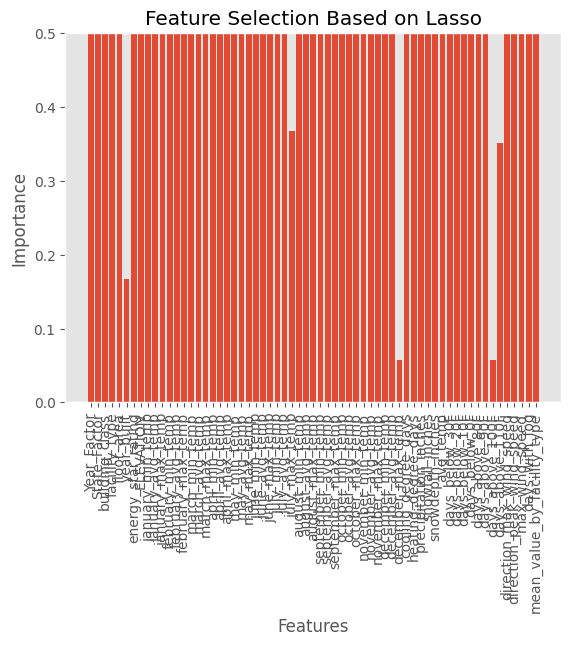

<Figure size 1000x600 with 0 Axes>

In [131]:
# calling the model with the best parameter
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train, y_train)

# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns.
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.5)
plt.figure(figsize=(50,6))
plt.show()

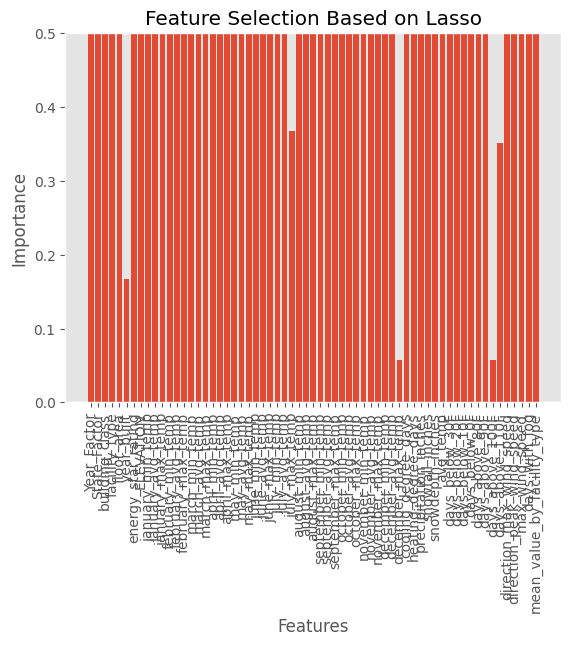

In [143]:

# plotting the Column Names and Importance of Columns.
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")

plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.5)

plt.show()

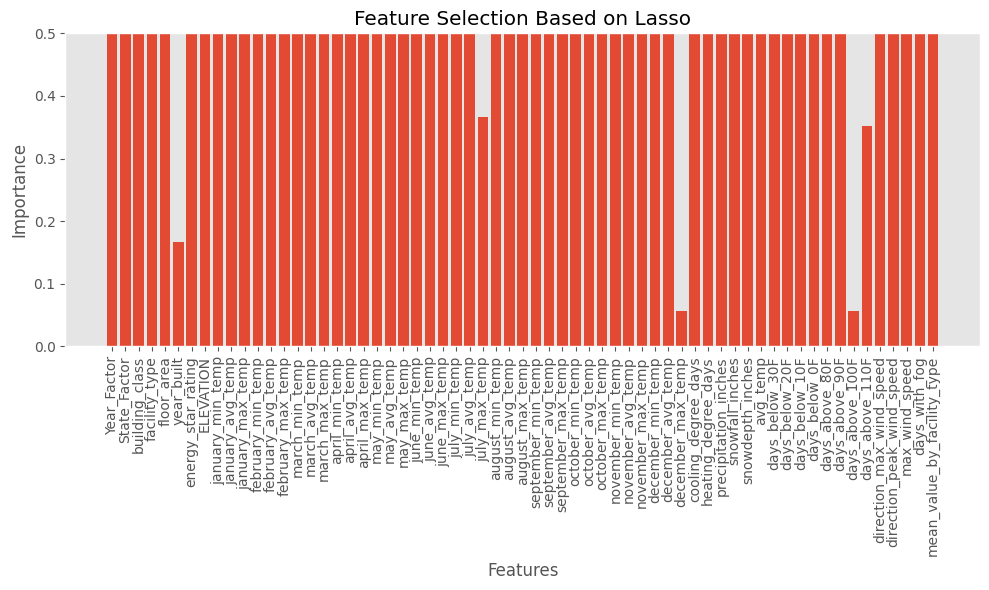

In [144]:
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")

plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.5)

plt.tight_layout()

plt.show()


In [141]:
lasso1_coef

array([ 6.82197568,  5.01533125,  4.54327908,  1.13634708,  1.58842155,
        0.16734245, 19.66837048,  0.67437611,  2.22328553, 14.84825807,
        3.54398498,  3.97994262,  2.25766891,  3.35353889,  4.6174218 ,
        3.63597259,  3.74102927,  2.5922581 ,  2.83176437,  5.60050919,
        1.90916986, 11.2439425 ,  1.04108877,  4.17163029,  5.38654206,
        0.93139932,  1.03404183,  8.89468585,  0.36667224,  2.04691281,
       14.98769594,  4.61916697,  2.48456914,  3.7254386 ,  0.50516357,
        2.09263703,  3.20888231,  5.05218754,  3.10416673,  3.96583606,
        3.71102766,  7.94514596,  4.76374744,  0.0573942 ,  2.03404882,
        6.74057358,  4.77901274,  1.21731289,  1.50974131,  3.11759415,
        0.79285763,  1.95243035,  0.91105513,  2.47058995,  4.79747243,
        1.05680098,  0.05727616,  0.35166451,  7.48567346,  3.32901828,
        4.38936699,  0.52813282, 24.68523284])

In [163]:


le = LabelEncoder()
for col in categorical_features:
    df[f'{col}_label'] = le.fit_transform(df[col])




In [164]:
# add mean facility value
mean_values = df.groupby('facility_type')['site_eui'].transform('mean')
df['mean_value_by_facility_type'] = mean_values
print(df['mean_value_by_facility_type'])


0        241.135162
1         39.559542
2        100.965937
3         69.441531
4         38.209399
            ...    
75752     77.074389
75753     36.737785
75754     92.642037
75755     92.642037
75756     31.876915
Name: mean_value_by_facility_type, Length: 75757, dtype: float64


In [165]:

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
enc.fit(df[['building_class']])

one_hot_encoded = enc.transform(df[['building_class']])
encoded_df = pd.DataFrame(one_hot_encoded, columns=['is_commercial', 'is_residential'])
df['is_commercial'] = encoded_df['is_commercial']
df['is_residential'] = encoded_df['is_residential']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
arr = y.values
arr=arr.reshape(-1, 1)
arr = sc_y.fit_transform(arr) #4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor herefrom sklearn.svm import SVR# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.regressor = SVR(kernel='rbf')
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X,y)#5 Predicting a new result
y_pred = regressor.predict(6.5)

#regressor.fit(X,arr) #5 Predicting a new result
#y_pred = regressor.predict(6.5)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE) on Test Set:", rmse)

In [188]:


def extract_main_facility_type(facility_type):
  return facility_type.split('_') [0]

def extract_secondary_facility_type(facility_type):
  return '_'.join(facility_type.split('_')[1:])



In [168]:
df['facility_type_2'] = df['facility_type'].apply(lambda x: extract_secondary_facility_type(x))
df['facility_type_1'] = df['facility_type'].apply(lambda x: extract_main_facility_type(x))
mean_values = df.groupby('facility_type_2')['site_eui'].transform('mean')
# Add the mean values as a new column
df['mean_value_by_facility_type_2'] = mean_values

mean_values = df.groupby('facility_type_1')['site_eui'].transform('mean')
# Add the mean values as a new column
df['mean_value_by_facility_type_1'] = mean_values




AttributeError: ignored